# Generate all connected graphs
snatched [from](https://matplotlib.org/matplotblog/posts/draw-all-graphs-of-n-nodes/)

This notebook generates all possible graphs with a given number of nodes; then selects from them all graphs that are 1) connected, 2) not isomorphic to other graphs in the set. On mylaptop it runs instantly for `n_vertices` from 2 to 5, takes a few seconds for n=6, and a few minutes for n=7. As the complexity is $O(\exp N^2)$, we can expect it to run a few hours for n=8, and a few days, maybe a week, for n=9 :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm

In [3]:
def plot_graphs(graphs, figsize=14, dotsize=20):
    """Utility to plot a lot of graphs from an array of graphs. 
    Each graphs is a list of edges; each edge is a tuple."""
    n = len(graphs)
    fig = plt.figure(figsize=(figsize,figsize))
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    k = int(np.sqrt(n))
    for i in range(n):
        plt.subplot(k+1,k+1,i+1)
        g = nx.Graph()
        for e in graphs[i]:            
            g.add_edge(e[0],e[1])
        nx.draw_kamada_kawai(g, node_size=dotsize)
        print('.', end='')

#plot_graphs([[(0,1),(1,2),(1,3)]])

In [4]:
def make_graphs(n=2, i=None, j=None):
    """Make a graph recursively, by either including, or skipping each edge.
    Edges are given in lexicographical order by construction."""
    out = []
    if i is None: # First call
        out  = [[(0,1)]+r for r in make_graphs(n=n, i=0, j=1)]
    elif j<n-1:
        out += [[(i,j+1)]+r for r in make_graphs(n=n, i=i, j=j+1)]
        out += [          r for r in make_graphs(n=n, i=i, j=j+1)]
    elif i<n-1:
        out = make_graphs(n=n, i=i+1, j=i+1)
    else:
        out = [[]]
    return out

In [5]:
def perm(n, s=None):
    """All permutations of n elements."""
    if s is None: return perm(n, tuple(range(n)))
    if not s: return [[]]
    return [[i]+p for i in s for p in perm(n, tuple([k for k in s if k!=i]))]

In [6]:
def permute(g, n):
    """Create a set of all possible isomorphic codes for a graph, 
    as nice hashable tuples. All edges are i<j, and sorted lexicographically."""
    ps = perm(n)
    out = set([])
    for p in ps:
        out.add(tuple(sorted([(p[i],p[j]) if p[i]<p[j] else (p[j],p[i]) for i,j in g])))
    return list(out)

In [7]:
def connected(g):
    """Check if the graph is fully connected, with Union-Find."""
    nodes = set([i for e in g for i in e])
    roots = {node: node for node in nodes}
    
    def _root(node, depth=0):
        if node==roots[node]: return (node, depth)
        else: return _root(roots[node], depth+1)
    
    for i,j in g:
        ri,di = _root(i)
        rj,dj = _root(j)
        if ri==rj: continue
        if di<=dj: roots[ri] = rj
        else:      roots[rj] = ri
    return len(set([_root(node)[0] for node in nodes]))==1         

In [8]:
def filter(gs, target_nv):
    """Filter all improper graphs: those with not enough nodes, 
    those not fully connected, and those isomorphic to previously considered."""
    mem = set({})
    gs2 = []
    for g in tqdm(gs):
        nv = len(set([i for e in g for i in e]))
        if nv != target_nv:
            continue
        if not connected(g):
            continue
        if tuple(g) not in mem:
            gs2.append(g)
            mem |= set(permute(g, target_nv))
    return gs2

  1%|          | 96/16384 [00:00<00:17, 948.45it/s]

Building...
Filtering...


100%|██████████| 16384/16384 [00:00<00:00, 23196.66it/s]


Drawing 112 graphs...
................................................................................................................CPU times: user 3.99 s, sys: 92.7 ms, total: 4.08 s
Wall time: 3.99 s


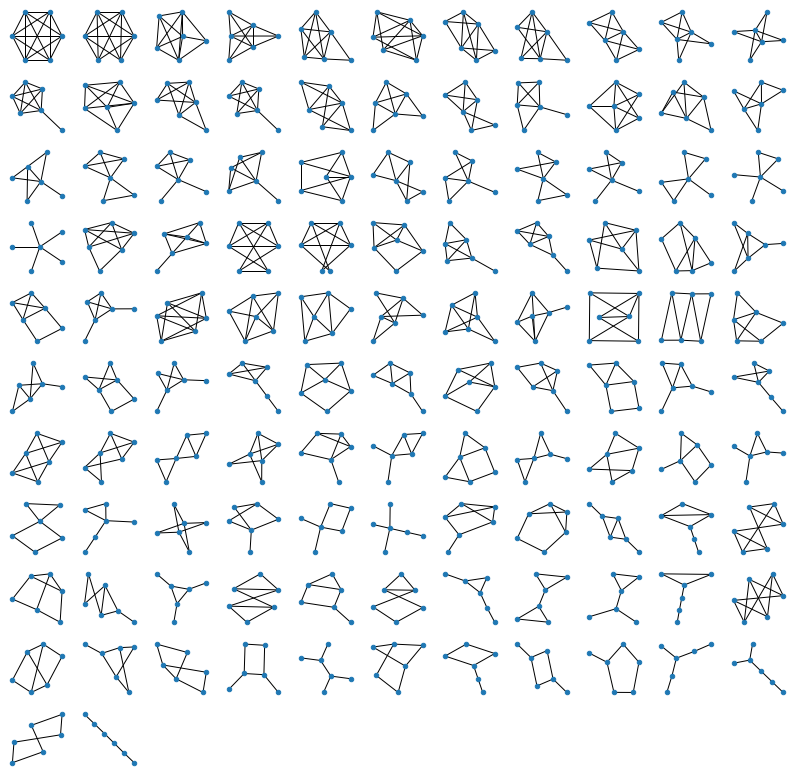

In [32]:
%%time
# Finally, we can do the calculation and make the plot!

NV = 6
print('Building...')
gs = make_graphs(NV)
print('Filtering...')
gs = filter(gs, NV)
print(f'Drawing {len(gs)} graphs...')
plot_graphs(gs, figsize=14, dotsize=20)

In [ ]:
%%time
# Plot again, with better layout
NV = 7
print('Building...')
gs = make_graphs(NV)
print('Filtering...')
gs = filter(gs, NV)
print(f'Drawing {len(gs)} graphs...')

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

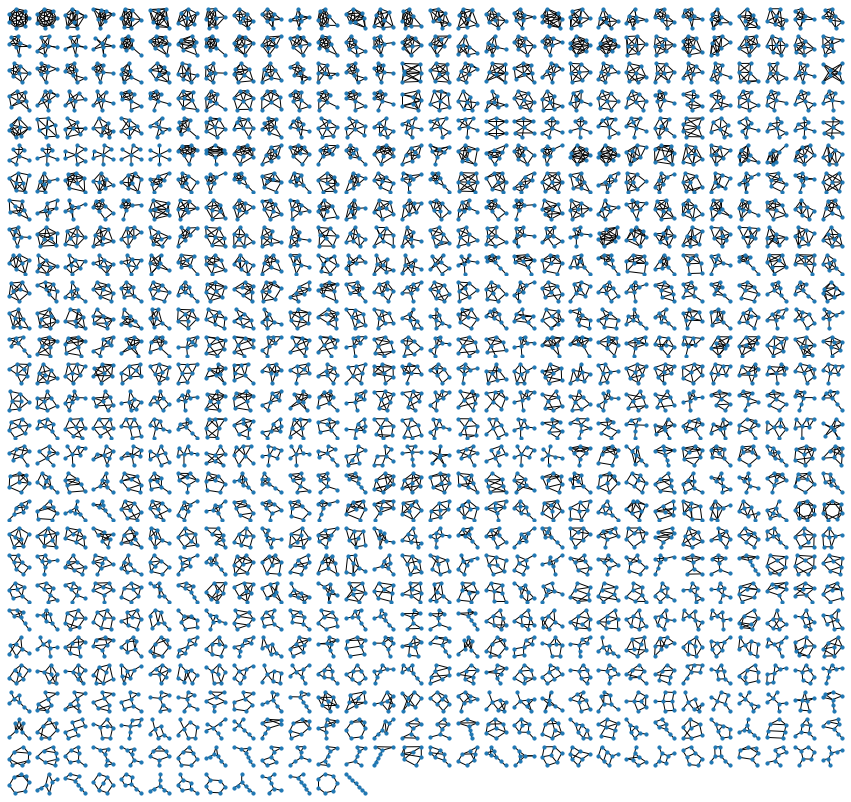

In [13]:
%%time
# Plot again, with better layout
plot_graphs(gs, figsize=15, dotsize=10)

In [ ]:
import json

for i in tqdm(range(3, 8)):
    %time ggg = make_graphs(i)
    with open(f"AllGraphs/all_{i}.json", "w") as f:
        print(json.dumps(ggg), file=f)
        
    %time gs = filter(ggg, i)
    with open(f"AllGraphs/isomorphs_{i}.json", "w") as f:
        print(json.dumps(gs), file=f)

100%|██████████| 4/4 [00:00<00:00, 11467.68it/s]

100%|██████████| 32/32 [00:00<00:00, 15111.21it/s]

100%|██████████| 512/512 [00:00<00:00, 22081.19it/s]


CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 48.6 µs
CPU times: user 4.88 ms, sys: 0 ns, total: 4.88 ms
Wall time: 4.03 ms
CPU times: user 201 µs, sys: 0 ns, total: 201 µs
Wall time: 206 µs
CPU times: user 6.26 ms, sys: 0 ns, total: 6.26 ms
Wall time: 5.44 ms
CPU times: user 3.14 ms, sys: 0 ns, total: 3.14 ms
Wall time: 3.16 ms
CPU times: user 23.5 ms, sys: 4.07 ms, total: 27.6 ms
Wall time: 26.4 ms
CPU times: user 118 ms, sys: 1.01 ms, total: 119 ms
Wall time: 119 ms



 67%|██████▋   | 4/6 [00:00<00:00,  4.07it/s]

CPU times: user 753 ms, sys: 7 µs, total: 753 ms
Wall time: 748 ms
CPU times: user 24.1 s, sys: 412 ms, total: 24.5 s
Wall time: 24.5 s



 55%|█████▌    | 577720/1048576 [00:50<00:08, 54050.82it/s]


 83%|████████▎ | 5/6 [01:30<00:23, 23.85s/it]

CPU times: user 59.1 s, sys: 1.23 s, total: 1min
Wall time: 1min


KeyboardInterrupt: 


  7%|▋         | 68654/1048576 [00:00<00:02, 347473.56it/s]